<a href="https://colab.research.google.com/github/NikhilJha11/RealEstate11/blob/Python(EDA%26ENG)/RealEstate_FeatureEng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Engineering**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('RealEstate_Preprocessed1.csv', encoding='unicode_escape')

df.head(5)

,ï»¿Name,Property_Title,Price_InLakhs,Location,Total_Area,Price_per_SQFT,Baths,Balcony,Typeof_flat,City
0,Casagrand ECR 14,4 BHK Flat for sale in Kanathur Reddikuppam Ch...,199,Kanathur Reddikuppam Chennai,2583,7700,4,1,4 BHK,Chennai
1,Ramanathan Nagar PozhichalurChennai,10 BHK Independent House for sale in Pozhichal...,225,Ramanathan Nagar PozhichalurChennai,7000,3210,6,1,10 BHK,Chennai
2,DAC Prapthi,3 BHK Flat for sale in West Tambaram Chennai,100,Kasthuribai Nagar West TambaramChennai,1320,7580,3,0,3 BHK,Chennai
3,NaveenilayaChepauk TriplicaneChennai,7 BHK Independent House for sale in Triplicane...,333,NaveenilayaChepauk TriplicaneChennai,4250,7840,5,1,7 BHK,Chennai
4,VGN Spring Field Phase 1,2 BHK Flat for sale in Avadi Chennai,48,Avadi Chennai,960,5000,3,1,2 BHK,Chennai


<ipython-input-52-479aaec0db01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Price_per_SQFT', y='City', inner='box', palette='Dark2')


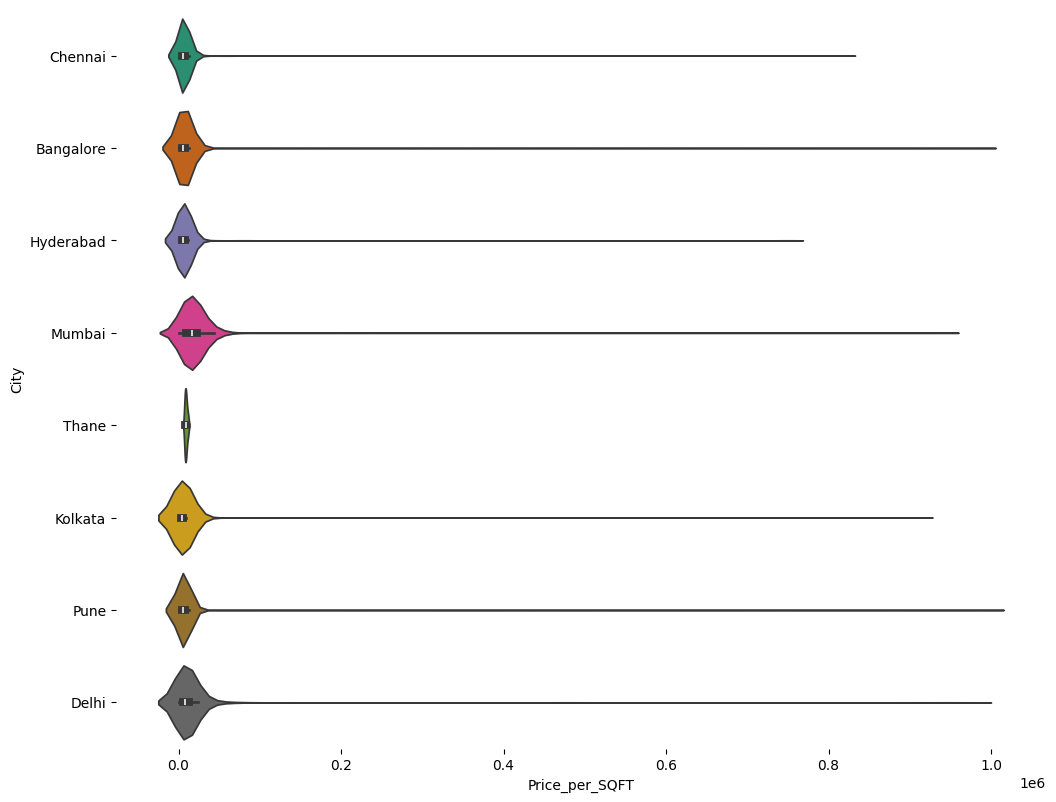

In [52]:
# @title City vs Price_per_SQFT

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price_per_SQFT', y='City', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

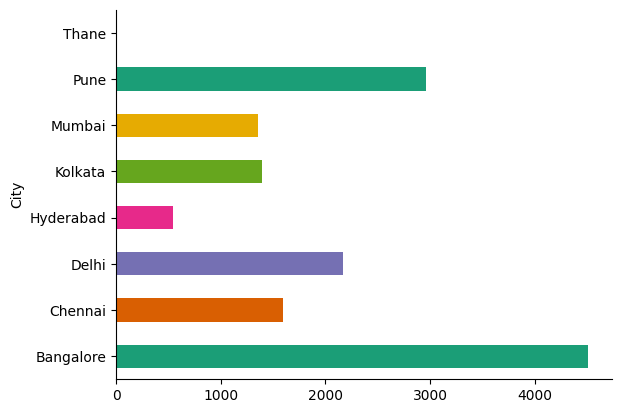

In [50]:
# @title City

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

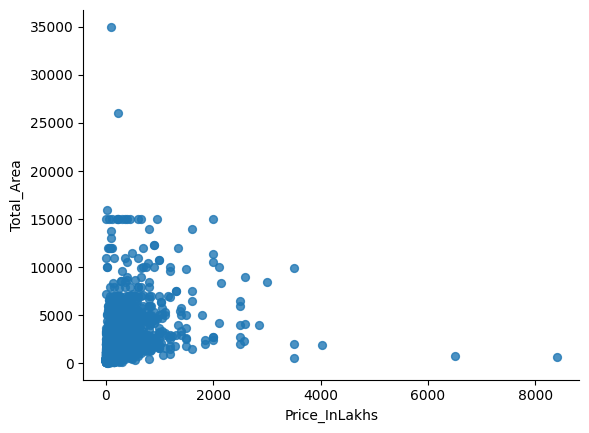

In [49]:
# @title Price_InLakhs vs Total_Area

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price_InLakhs', y='Total_Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df["Typeof_flat"].unique()

array(['4 BHK', '10 BHK', '3 BHK', '7 BHK', '2 BHK', '1 BHK', '6 BHK',
       '5 BHK', '1 RK', '8 BHK', '1.5 BHK', '2.5 BHK', '9 BHK', '3.5 BHK',
       '5+ BHK', nan, '6 RK', '10.5 BHK', '4.5 BHK', '9.5 BHK', '8.5 BHK',
       '7.5 BHK', '5 RK', '2 RK', '3 RK', '4 RK'], dtype=object)

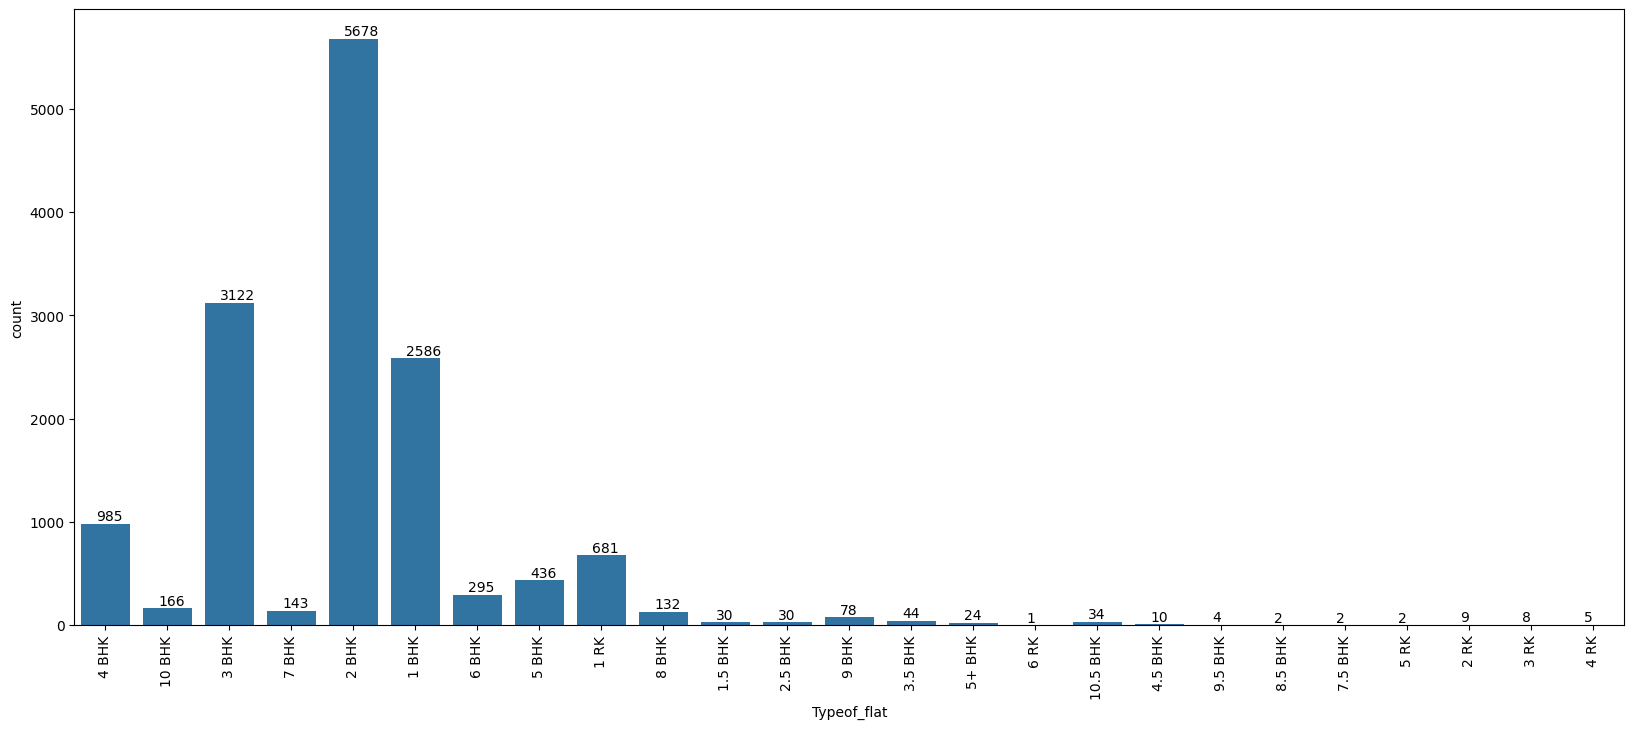

In [5]:
# xticks rotation is used  when the labels are long or crowded, making them more readable.
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'Typeof_flat', data = df)
plt.xticks(rotation = 90)
# Iterates over each bar (patch) in the count plot. ax.patches is a list of all the rectangles (bars) in the plot.
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

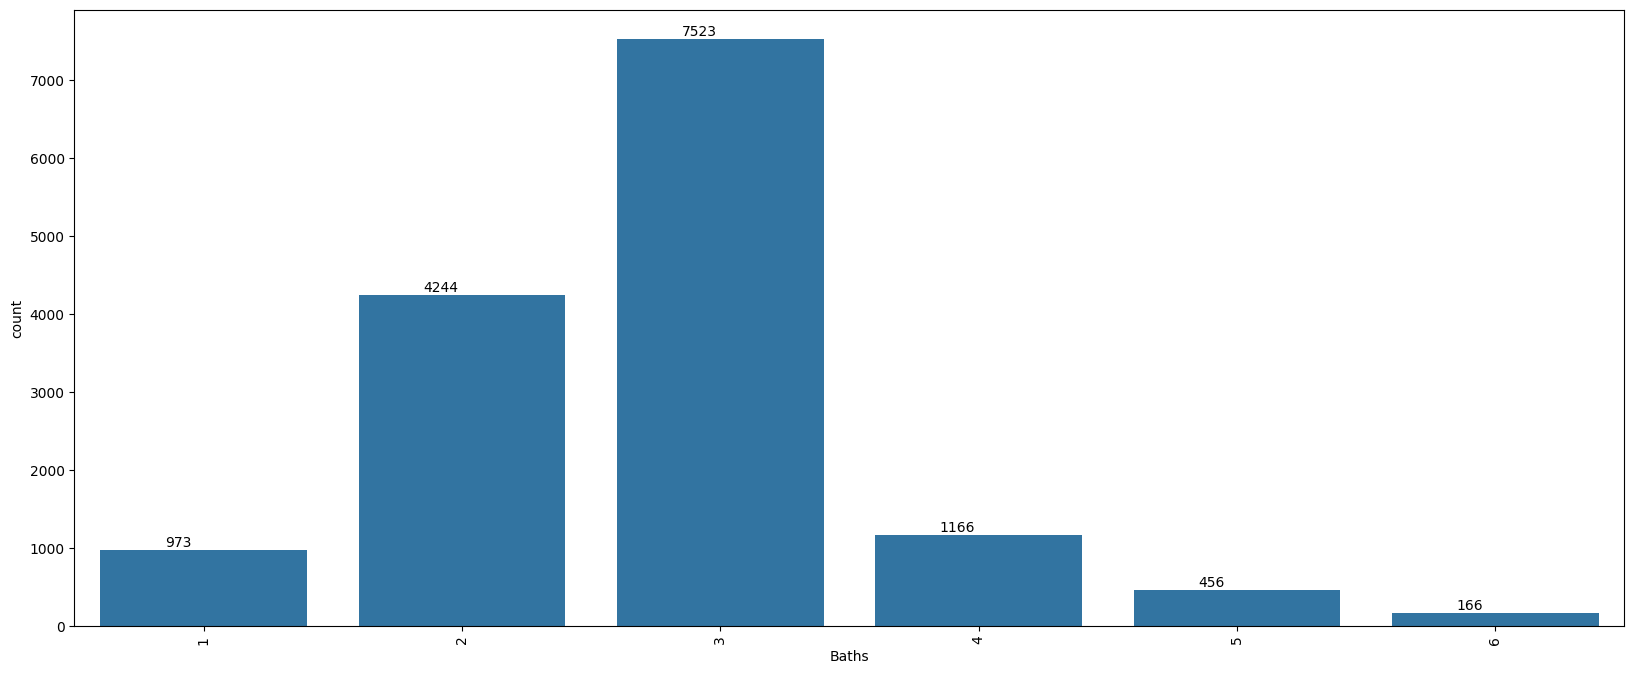

In [6]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'Baths', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

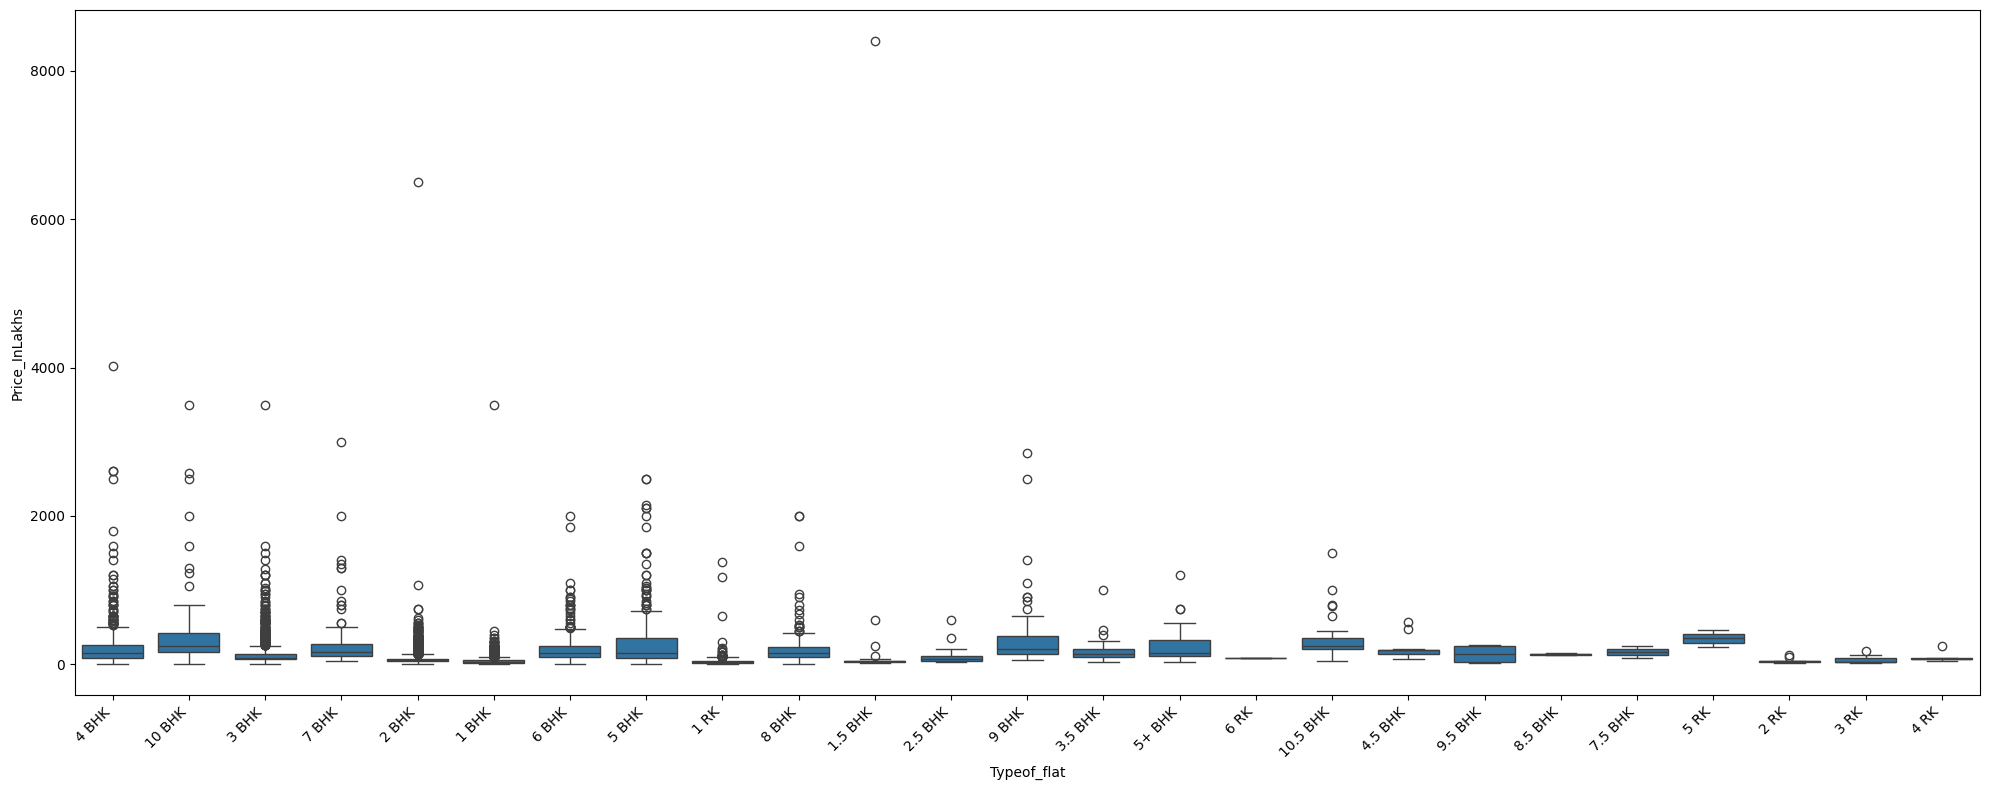

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(20, 8))  # Adjust the figure size to provide enough space
sns.boxplot(x="Typeof_flat", y="Price_InLakhs", data=df)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, align to the right

# Adjust layout to fit the labels properly
plt.tight_layout()

# Show the plot
plt.show()


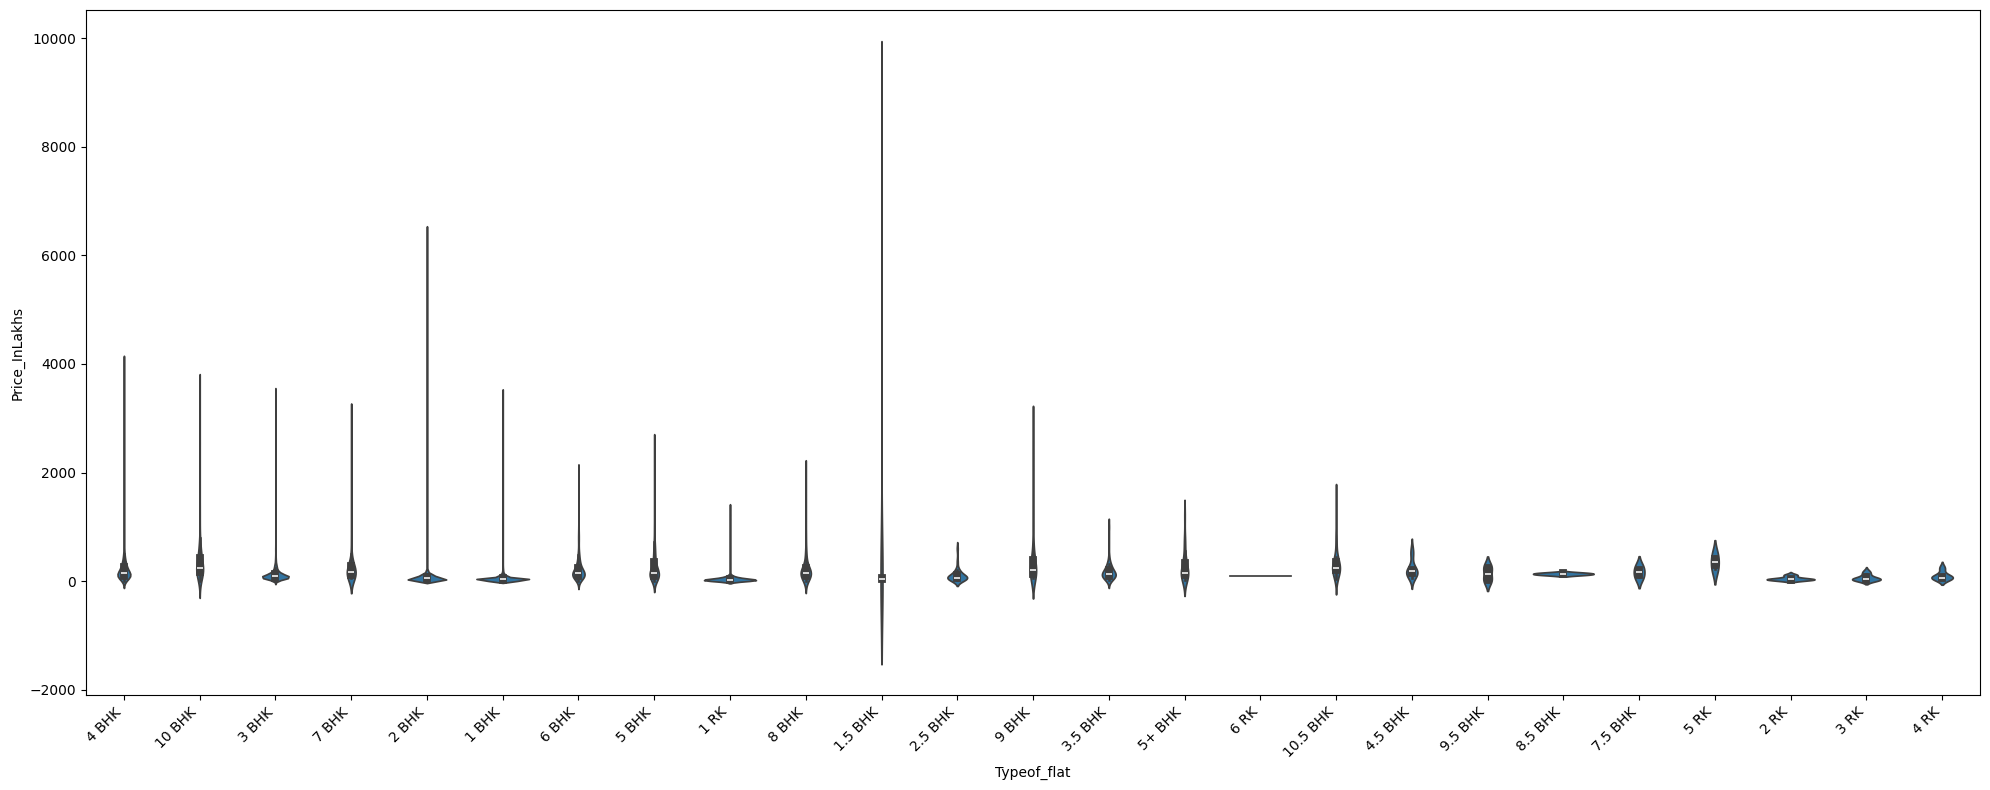

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Violin plot
plt.figure(figsize=(20, 8))  # Adjust the figure size to provide enough space
sns.violinplot(x="Typeof_flat", y="Price_InLakhs", data=df)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, align to the right

# Adjust layout to fit the labels properly
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

df[~df["Price_InLakhs"].apply(is_float)].head(10)

,ï»¿Name,Property_Title,Price_InLakhs,Location,Total_Area,Price_per_SQFT,Baths,Balcony,Typeof_flat,City


In [16]:
import numpy as np

# Create a copy of the Price_InLakhs column to store the new Price_Growth values
df['Price_Growth'] = df['Price_InLakhs']

# Apply a 10% increase for Mumbai
df.loc[df['City'] == 'Mumbai', 'Price_Growth'] *= 1.10

# Apply a 15% increase for Chennai
df.loc[df['City'] == 'Chennai', 'Price_Growth'] *= 1.15

# Apply a 7% decrease for Bangalore
df.loc[df['City'] == 'Bangalore', 'Price_Growth'] *= 0.93

# For the rest of the cities, apply a random increase between 10% and 20%
df.loc[~df['City'].isin(['Mumbai', 'Chennai', 'Bangalore']), 'Price_Growth'] *= (
    1 + np.random.uniform(0.10, 0.20, df.loc[~df['City'].isin(['Mumbai', 'Chennai', 'Bangalore'])].shape[0])
)

# Optionally round the values for better readability (you can adjust the decimals as needed)
df['Price_Growth'] = df['Price_Growth'].round(2)

# Display the updated DataFrame
print(df[['City', 'Price_InLakhs', 'Price_Growth']].head())


      City  Price_InLakhs  Price_Growth
0  Chennai            199        228.85
1  Chennai            225        258.75
2  Chennai            100        115.00
3  Chennai            333        382.95
4  Chennai             48         55.20


<ipython-input-16-ebfc54027ca2>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 52.8 627.  269.5 ...  27.5  38.5  27.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['City'] == 'Mumbai', 'Price_Growth'] *= 1.10


In [19]:
df["City"].unique()

array(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Thane', 'Kolkata',
       'Pune', 'Delhi'], dtype=object)

In [20]:
def get_city_data(df, cities, n=3):
    result = pd.DataFrame()

    for city in cities:
        city_data = df[df['City'] == city][['City', 'Price_InLakhs', 'Price_Growth']].head(n)
        result = pd.concat([result, city_data])

    return result

cities = ['Mumbai', 'Delhi', 'Bangalore', 'Pune', 'Chennai', 'Hyderabad']
city_data = get_city_data(df, cities, n=3)

print(city_data)


            City  Price_InLakhs  Price_Growth
6648      Mumbai             48         52.80
6649      Mumbai            570        627.00
6650      Mumbai            245        269.50
12363      Delhi             60         71.71
12364      Delhi             37         41.37
12365      Delhi             48         53.65
1595   Bangalore             56         52.08
1596   Bangalore             42         39.06
1597   Bangalore            300        279.00
9399        Pune             57         68.12
9400        Pune             48         55.91
9401        Pune             32         37.77
0        Chennai            199        228.85
1        Chennai            225        258.75
2        Chennai            100        115.00
6108   Hyderabad            177        205.67
6109   Hyderabad             96        113.71
6110   Hyderabad            150        177.93


In [31]:
df = df.rename(columns={'ï»¿Name': 'Name'})

In [21]:
# Save the modified DataFrame to a CSV file
df.to_csv('modified_real_estate_data.csv', index=False)


from google.colab import files
files.download('modified_real_estate_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
df["Baths"].unique()
df["Balcony"].unique()
df["City"].unique()

array(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Thane', 'Kolkata',
       'Pune', 'Delhi'], dtype=object)

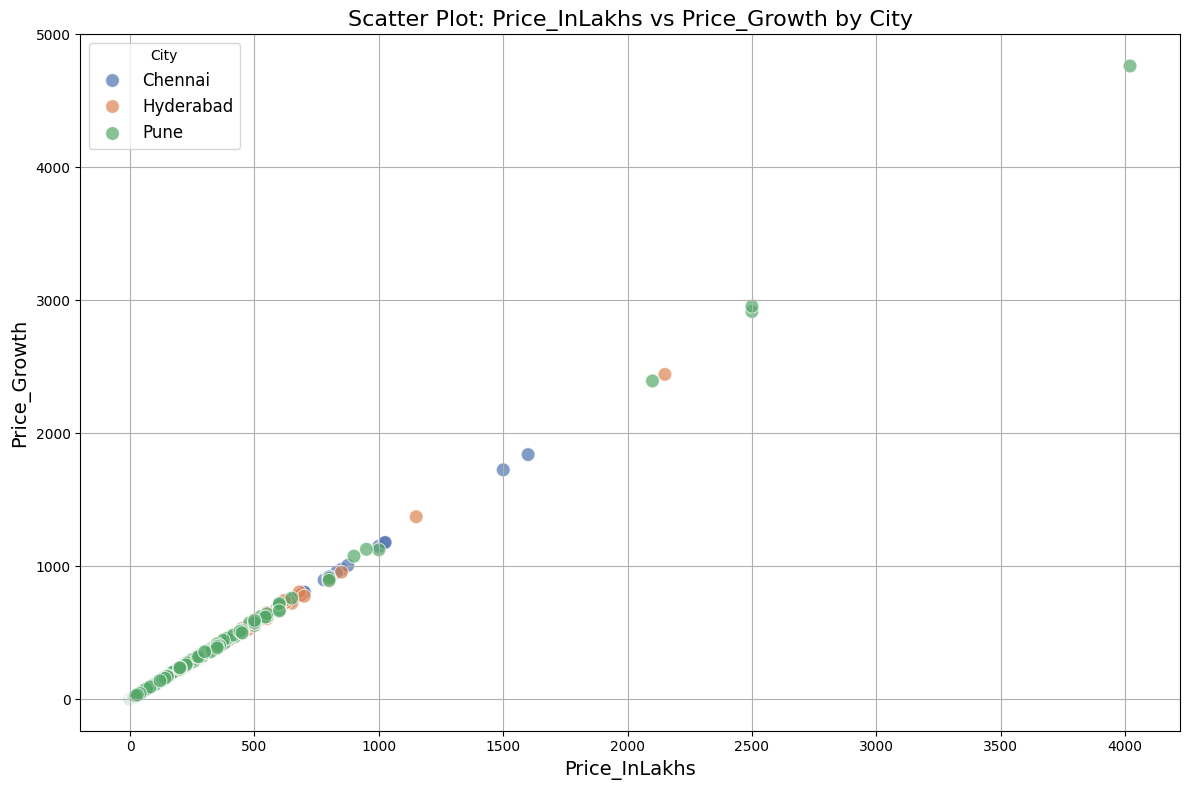

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the specified cities
filtered_df = df[df['City'].isin(['Hyderabad', 'Chennai', 'Pune'])]

plt.figure(figsize=(12, 8))

# Removed the jitter parameter
sns.scatterplot(x='Price_InLakhs', y='Price_Growth', hue='City',
                data=filtered_df, alpha=0.7, palette='deep',
                s=100, edgecolor='w')

plt.title('Scatter Plot: Price_InLakhs vs Price_Growth by City', fontsize=16)
plt.xlabel('Price_InLakhs', fontsize=14)
plt.ylabel('Price_Growth', fontsize=14)

plt.legend(title='City', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

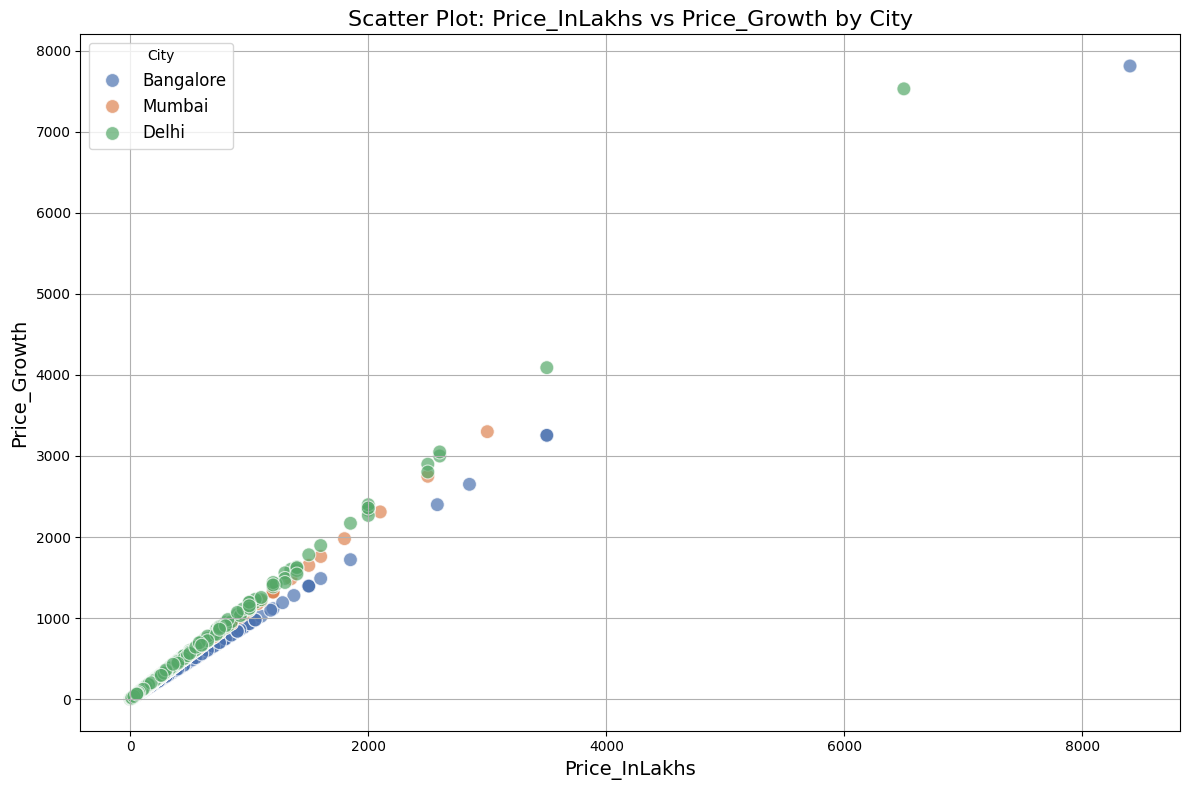

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the specified cities
filtered_df = df[df['City'].isin(['Mumbai', 'Bangalore', 'Delhi'])]

plt.figure(figsize=(12, 8))

# Removed the jitter parameter
sns.scatterplot(x='Price_InLakhs', y='Price_Growth', hue='City',
                data=filtered_df, alpha=0.7, palette='deep',
                s=100, edgecolor='w')

plt.title('Scatter Plot: Price_InLakhs vs Price_Growth by City', fontsize=16)
plt.xlabel('Price_InLakhs', fontsize=14)
plt.ylabel('Price_Growth', fontsize=14)

plt.legend(title='City', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### **CLUSTERING**

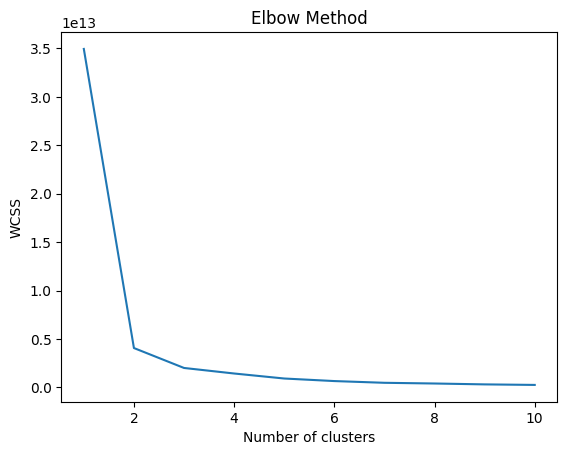

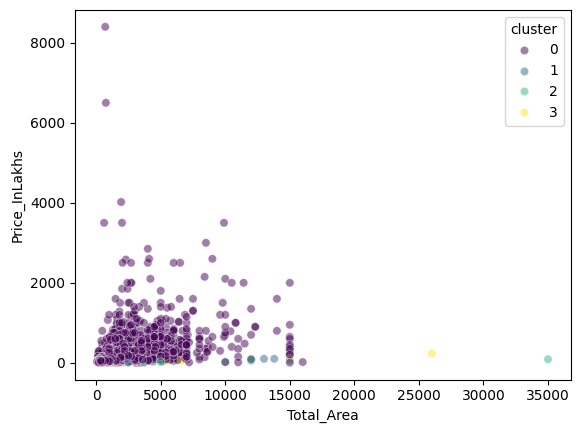

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering (only numerical features)
cluster_features = ["Price_InLakhs", "Total_Area", "Price_per_SQFT", "Baths", "Balcony","Price_Growth"]

# Use df instead of data
X_cluster = df[cluster_features]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train a K-means clustering model
optimal_clusters = 4  # Example
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=5, random_state=42)
# Use df instead of data
df["cluster"] = kmeans.fit_predict(X_cluster)

# Visualize the clusters
sns.scatterplot(x="Total_Area", y="Price_InLakhs", hue="cluster", data=df, palette="viridis", legend="full", alpha=0.5)
plt.show()